## Steps :
- Importing Libraries
- Import Data
- Visualisation
- Checking Outliers
- Visualize the decision boundaries of the classifier
- Interview Questions

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
zd = pd.read_csv('Zoo.csv')
zd

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Visualisation

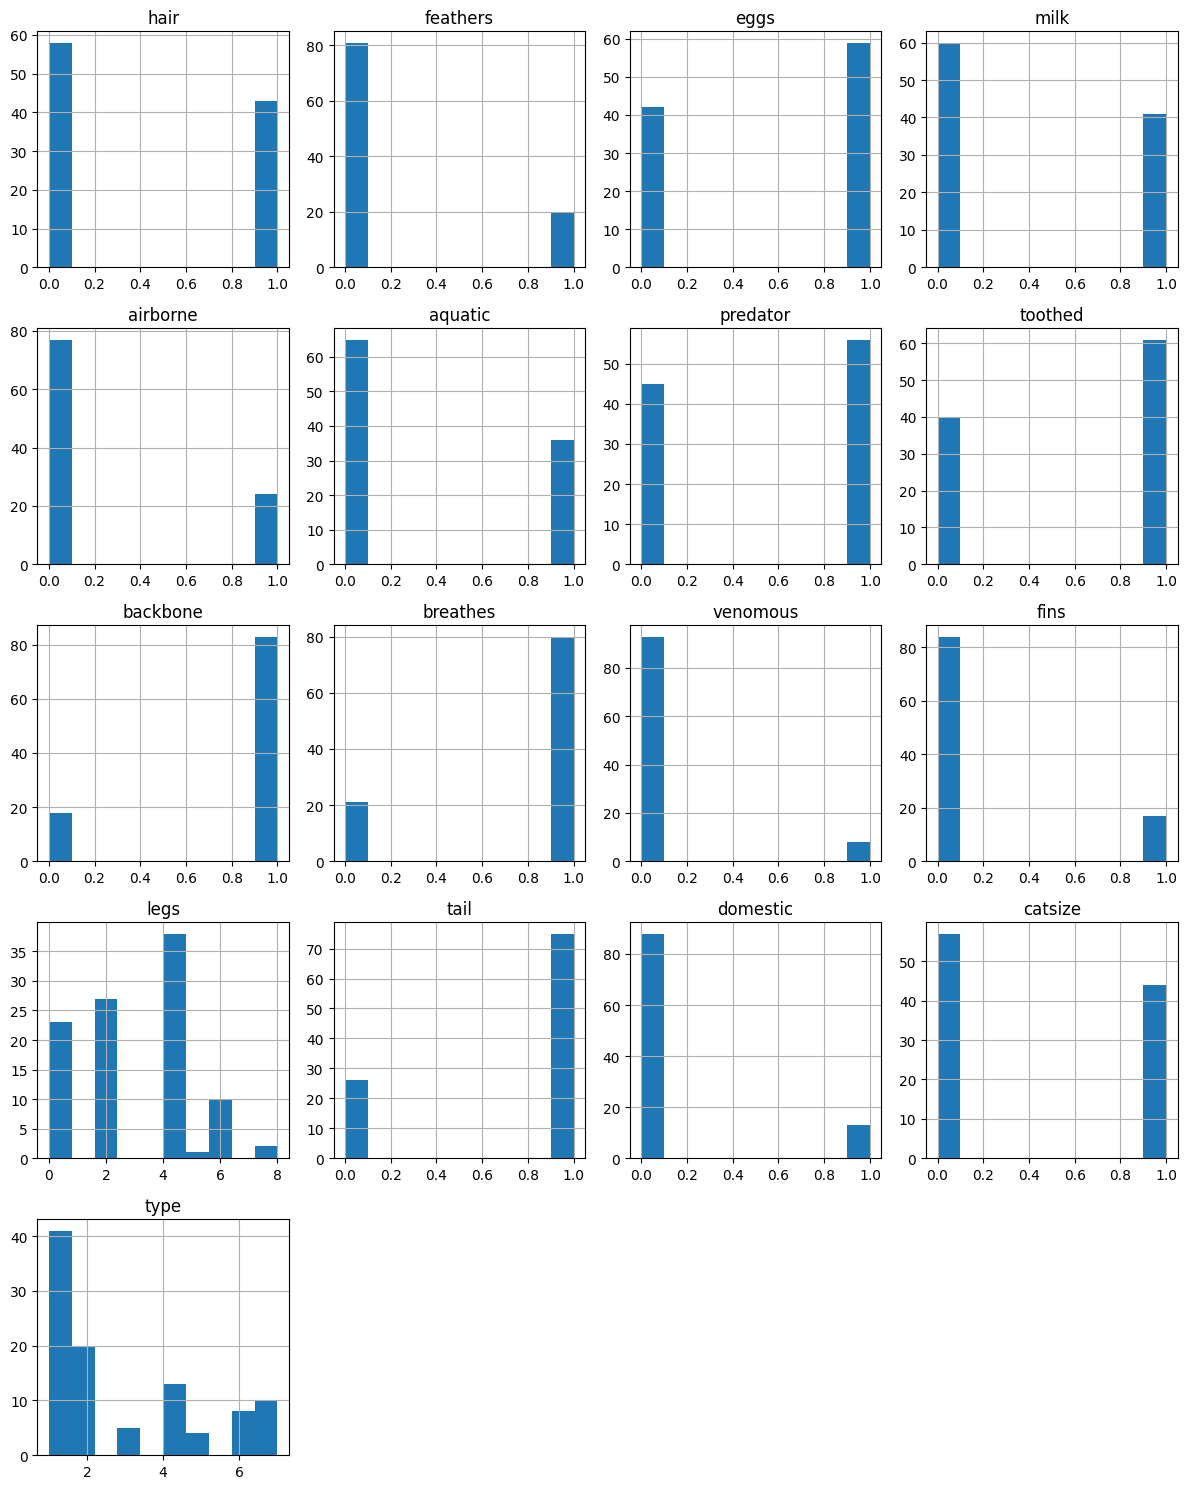

In [4]:
# Histograms

# Exclude the 'animal name' column as it is not numerical
numerical_cols = zd.select_dtypes(include=np.number).columns.tolist()

# Calculate the number of rows and columns for the layout dynamically
num_plots = len(numerical_cols)
num_cols = 4  # You can adjust the number of columns as needed
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

zd[numerical_cols].hist(figsize=(12, num_rows * 3), layout=(num_rows, num_cols))  # Adjust figsize and layout
plt.tight_layout()
plt.show()

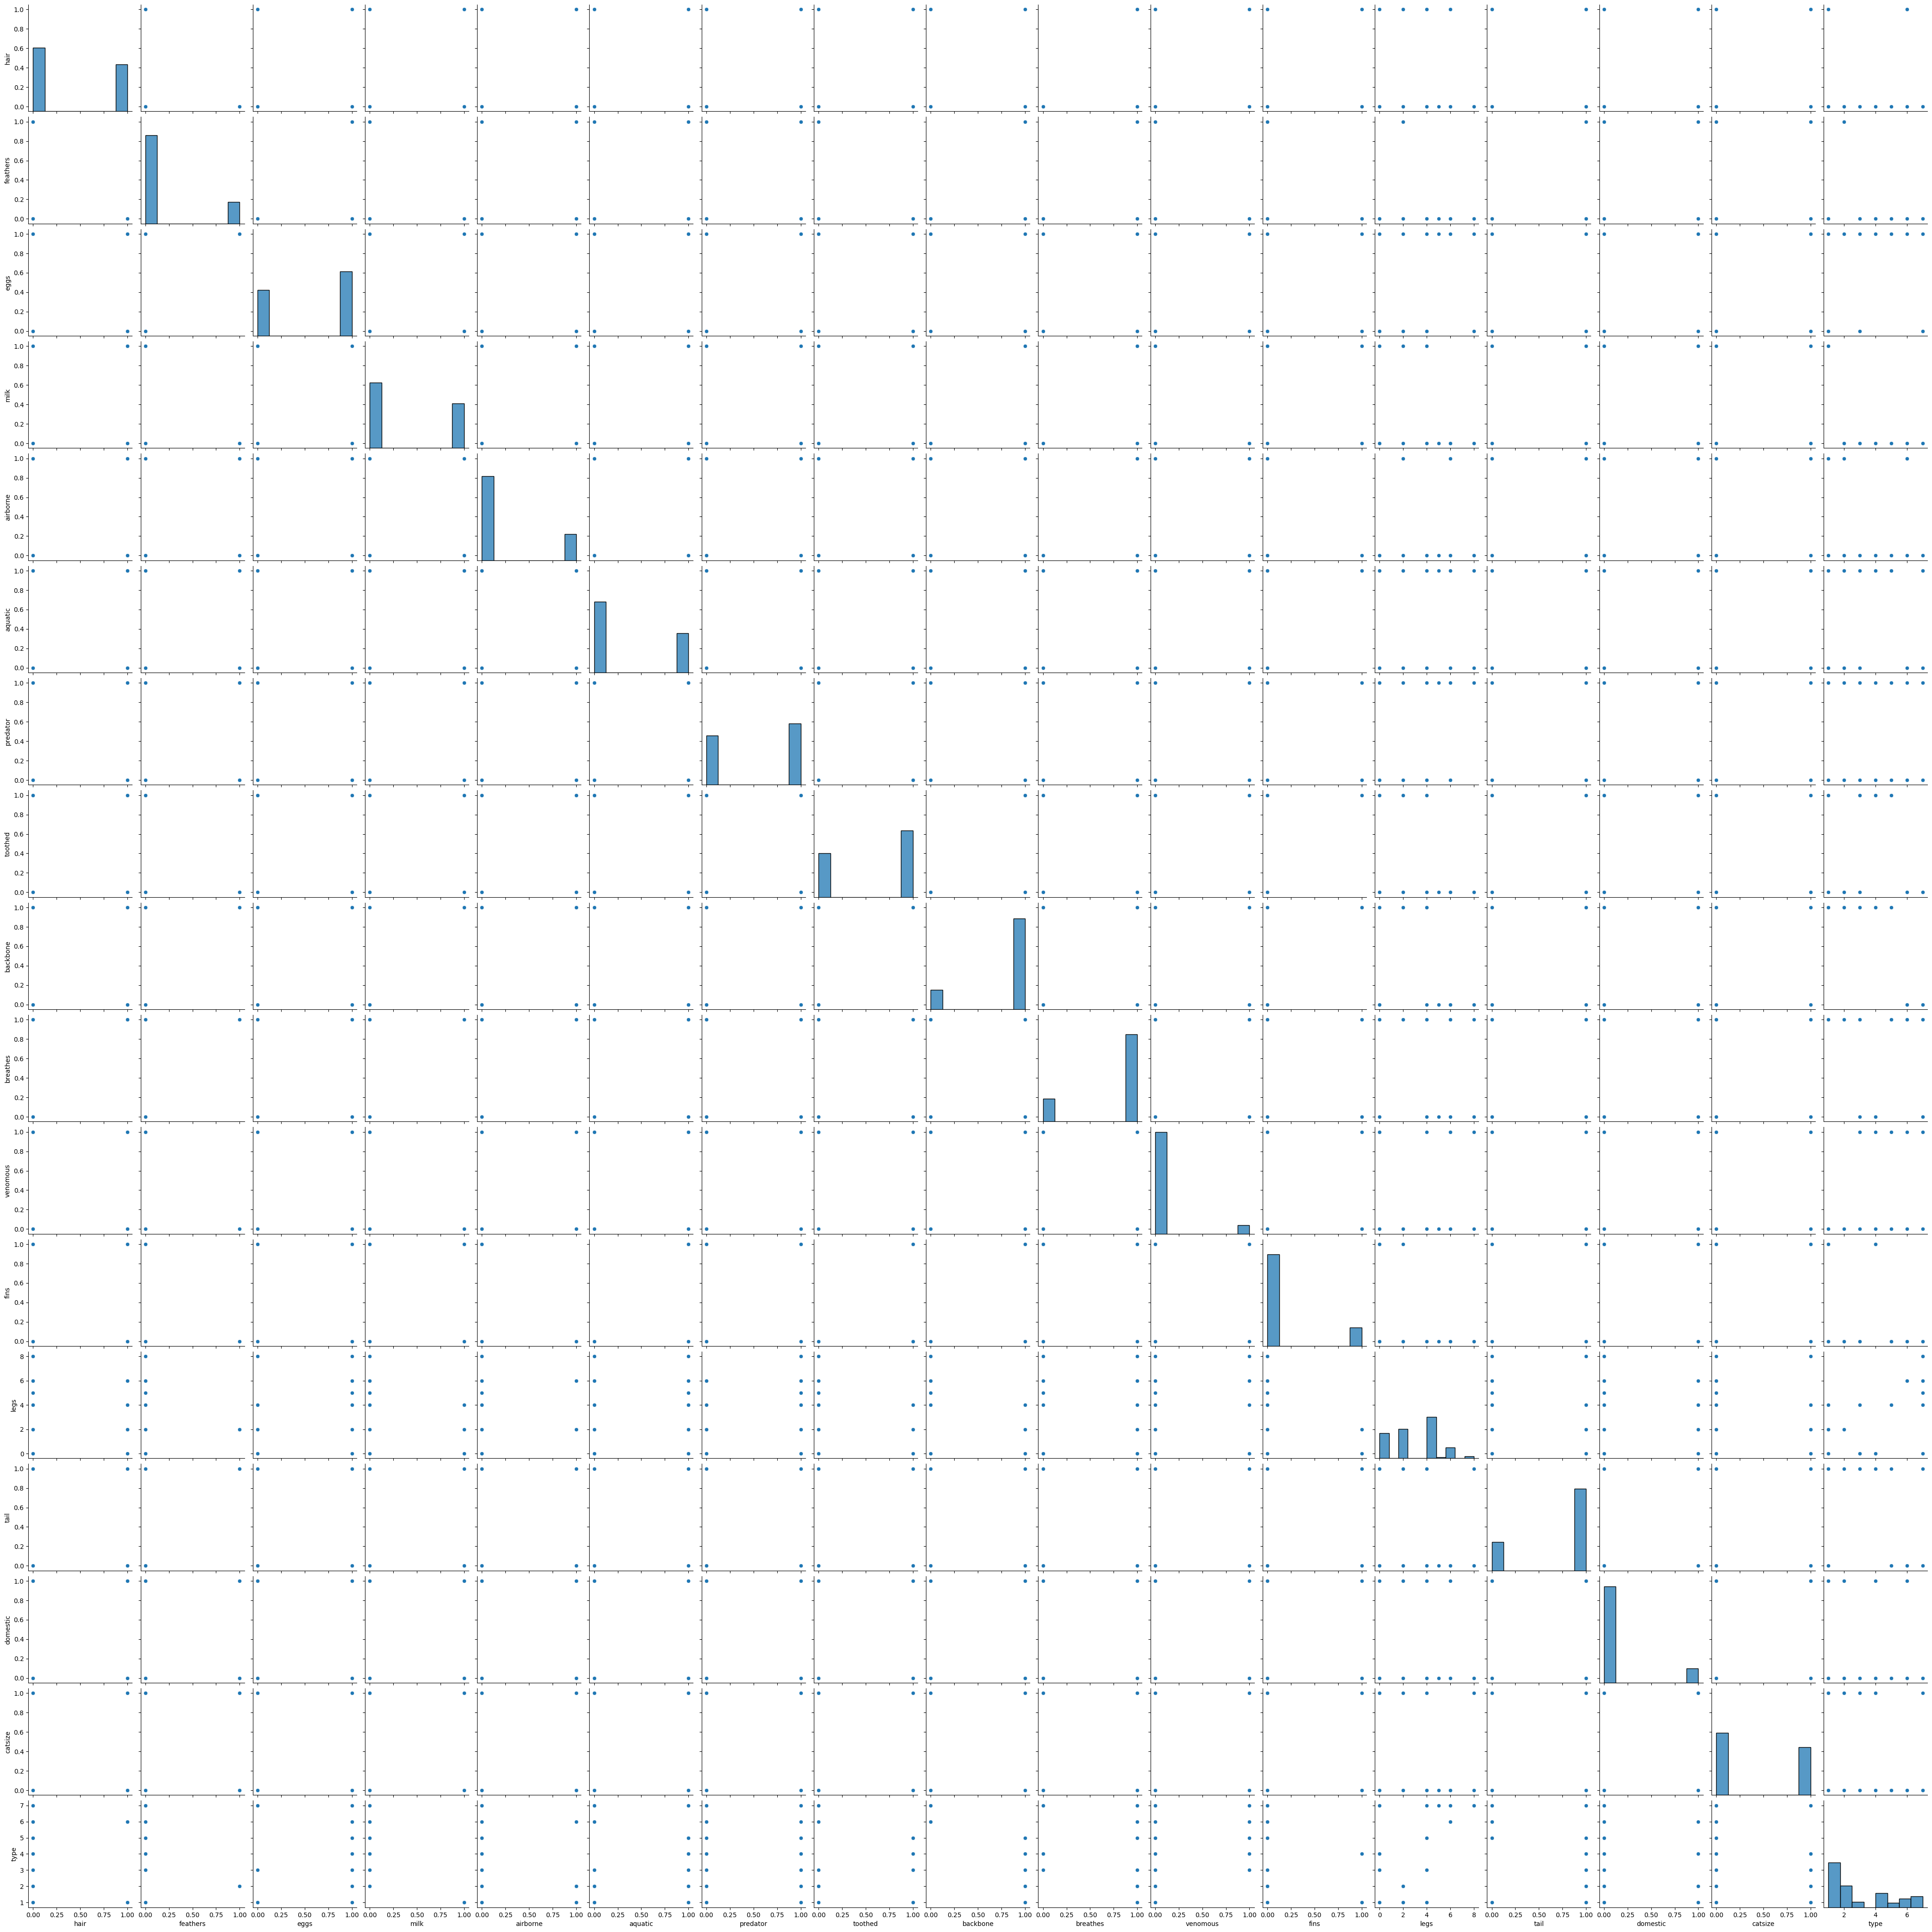

In [6]:
# pairplot

sns.pairplot(zd)
plt.show()

In [7]:
zd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
zd.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
zd.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [10]:
#check if there are duplicates in animal_name

duplicates = zd['animal name'].value_counts()
duplicates[duplicates > 1]

,count
animal name,
frog,2


In [11]:
frog = zd[zd['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [12]:
#find that one frog is venomous and another one is not
# change the venomous one into frog2 to seperate 2 kinds of frog

zd['animal name'][(zd['type'] == 1 )& (zd['animal name'] == 'frog')] = "venfrog"

In [13]:
zd['type'].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [14]:
zd.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Checking Outliers

<Axes: >

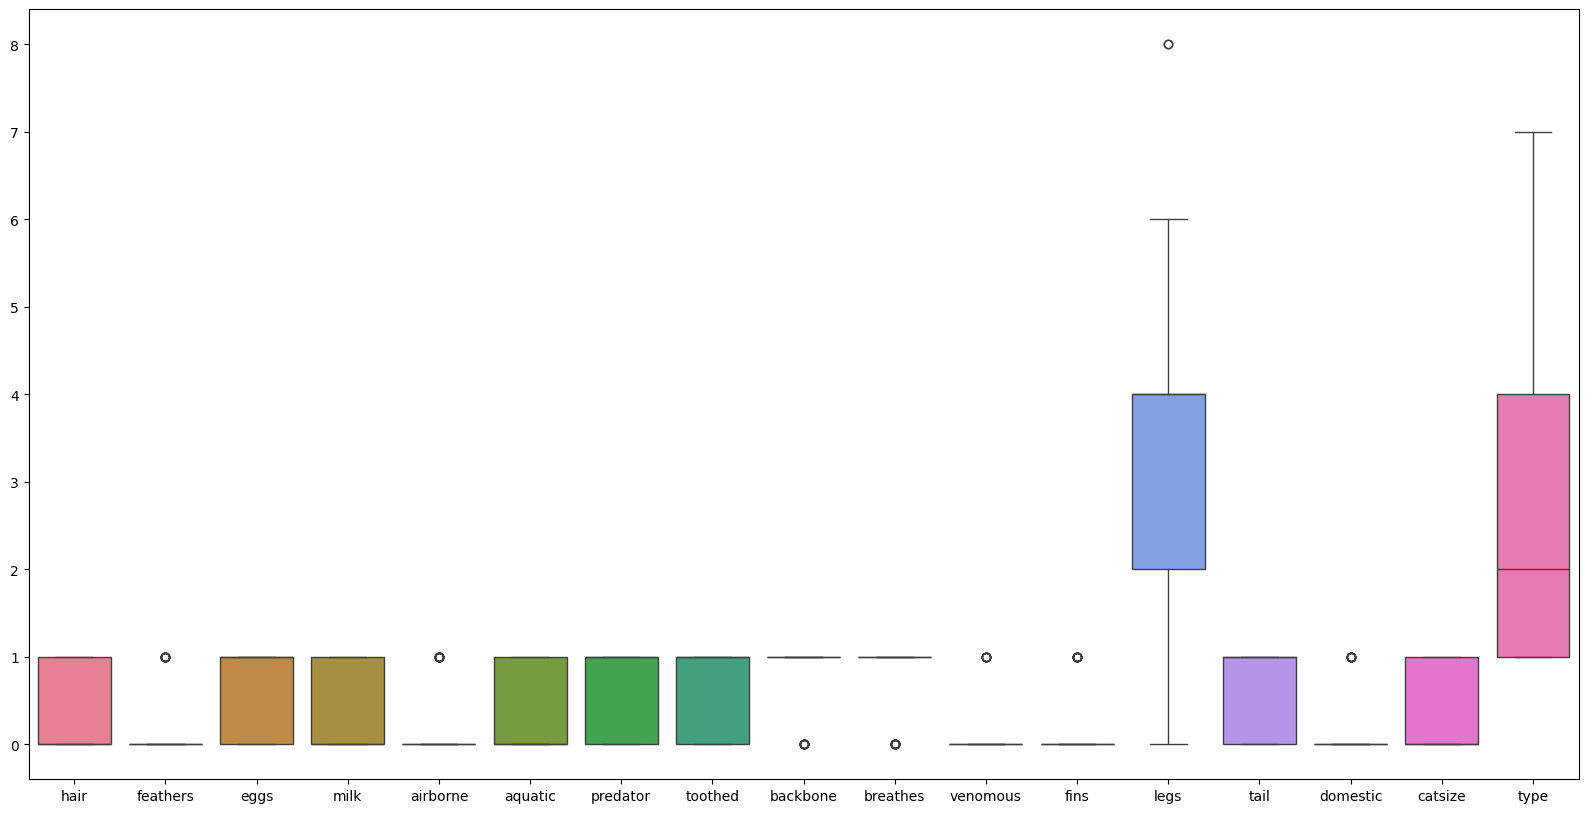

In [15]:

plt.figure(figsize=(20,10))
sns.boxplot(zd)

In [16]:
# Function to remove outliers using IQR

def outlier_Detection(zd,columns):
    for col in columns:
        Q1=zd[col].quantile(0.25)
        Q3=zd[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        zd[col]=np.where(zd[col]>upper,upper,np.where(zd[col]<lower,lower,zd[col]))
    return zd

In [17]:
outlier_Detection(zd,['feathers','airborne','backbone','breathes','venomous','fins','legs','domestic'])

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
1,antelope,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
2,bass,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0,4
3,bear,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1,1
4,boar,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,2.0,1,0.0,1,1
97,wasp,1,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,6.0,0,0.0,0,6
98,wolf,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1,1
99,worm,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,0.0,0,0.0,0,7


In [18]:
# converting object columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
zd['animal name'] = label_encoder.fit_transform(zd['animal name'])


In [20]:
# Spliting as dataset into training and testing

from sklearn.model_selection import train_test_split
x = zd.drop(['type'],axis=1)
y = zd['type']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.2,random_state=1)

In [22]:
xtrain

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
29,28,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,2.0,0,0.0,1
28,27,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
11,11,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,2.0,1,0.0,0
18,18,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,1
20,20,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,2.0,1,0.0,0
50,49,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
25,25,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,0
6,6,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
71,70,0,0.0,1,0,0.0,0,1,0,1.0,1.0,0.0,0.0,2.0,1,0.0,1
76,75,0,0.0,0,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0


In [23]:
xtest

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
94,93,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,0
78,77,0,0.0,1,0,0.0,1,1,0,1.0,1.0,0.0,0.0,2.0,1,0.0,0
17,17,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
100,99,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,2.0,1,0.0,0
36,35,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,96,1,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,6.0,0,0.0,0
13,13,0,0.0,1,0,0.0,0,1,0,1.0,1.0,0.0,0.0,0.0,0,0.0,0
68,67,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
86,85,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,1


In [24]:
num_folds = 10
kfold = KFold(n_splits=10)

In [25]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, x, y, cv=kfold)

In [26]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=17)

In [27]:
#Predicting on test data
pred = model.predict(xtest)
ypreds = model.predict(xtest) # predicting on test data set
pd.Series(ypreds).value_counts() # getting the count of each category

,count
1,81


In [28]:
model.score(xtrain,ytrain)

0.45

In [29]:
# Choose an appropriate distance metric and value for K.

# Set the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],  # Values of K to test
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to test
}

In [30]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

In [31]:
# Perform GridSearchCV to find the best combination of K and distance metric
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search model
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]},
             scoring='accuracy')

In [32]:
# Get the best parameters and model
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
best_model = grid_search.best_estimator_

# Output the best K, distance metric, and accuracy on the test set
print(f"Best K: {best_k}")
print(f"Best Metric: {best_metric}")

Best K: 9
Best Metric: euclidean


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(ytest, ypreds)
precision = precision_score(ytest, ypreds, average='weighted')  # Weighted average for multi-class
recall = recall_score(ytest, ypreds, average='weighted')
f1 = f1_score(ytest, ypreds, average='weighted')

In [34]:
# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.3951
Precision: 0.1561
Recall: 0.3951
F1 Score: 0.2238


# Visualize the decision boundaries of the classifier.

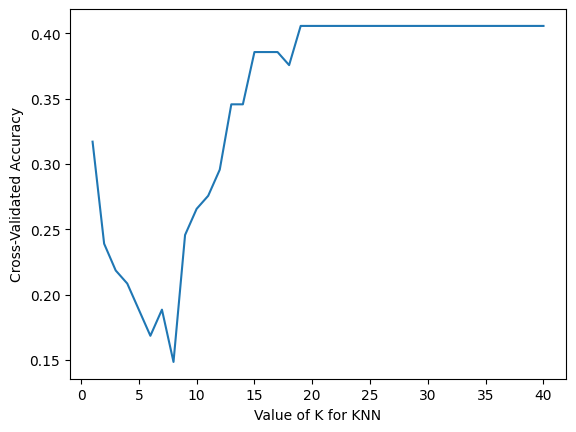

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Interview Questions:

## 1. What are the key hyperparameters in KNN?
- The main hyperparameter to tune in k-nearest neighbors is k, the number of neighbors to consider. Other parameters include distance metrics, weights, and algorithm types.
- Choosing the optimal values for the k and num_candidates involves balancing precision, recall, and performance.
- These parameters play a crucial role to efficiently handle high-dimensional vector spaces commonly found in machine learning applications.

## 2.What distance metrics can be used in KNN?
- The right distance metric to use depends on the nature of the data. For example, you can use cross-validation to test different distance metrics and values of 'k' to find the best combination for your dataset.
- Some distance metrics used in the K-Nearest Neighbors (KNN) algorithm include:
Euclidean distance
Manhattan distance
Minkowski distance
Hamming distance